En el presente notebook se exponen los resultados obtenidos por el equipo Programmasch para la I Datathon Interna convocada por el Grupo de Física Teórica y Matemática Aplicada, con apoyo de Guane Enterprises.

El equipo conformado por Cristian Oswaldo Serna Henao y Juan Pablo Ortiz Gil realizó dos modelos enfocados a clasificación de párrafos noticiosos, uno para clasificar la gravedad y otro para clasificar el sesgo, estos mismos se encuentran a continuación. Con el fin de evaluar los modelos, se muestran las métricas de "precision", "recall" y la matriz de confusión. 

In [1]:
#Libreria necesaria para importar la tokenización.
!pip install pickle5

In [2]:
#Librerias necesarias para el proceso.
from google.colab import drive

import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences

from sklearn.metrics import precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import recall_score

from mlxtend.plotting import plot_confusion_matrix
import pickle5 as pickle

In [3]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#Ubicar la ruta en la que tenga guardado el DataSet, con el fin de realizar el preprocesado de datos.
CSV_Path ="/content/drive/MyDrive/IdentificacionSesgo - DataSet.csv"
df = pd.read_csv(CSV_Path, header = 0)
df['GravedadMode'] = df['Gravedad'].str.split(',',expand=True).mode(axis=1, numeric_only=False, dropna=True)[0]
df['SesgoMode'] = df['Sesgo'].str.split(',',expand=True).mode(axis=1, numeric_only=False, dropna=True)[0]
df = df[['Item (Texto)', 'GravedadMode', 'SesgoMode']]

x = df['Item (Texto)'].values
y_g = df['GravedadMode'].values
y_s = df['SesgoMode'].values

#En el siguiente bloque, cambiar a la carpeta en la que estén los modelos compartidos.

In [5]:
cd drive/MyDrive

/content/drive/MyDrive


In [6]:
#Carga de los modelos.
model_gravedad = keras.models.load_model('neural_v3_grav_r0.h5')
model_sesgo = keras.models.load_model('neural_v3_ses_r0.h5')

In [7]:
#Carga de la tokenización.
with open('tokenizer_grav.pickle', 'rb') as handle1:
    tg = pickle.load(handle1)

with open('tokenizer_ses.pickle', 'rb') as handle:
    ts = pickle.load(handle)

In [8]:
#Función para crear la matriz de confusión.
def cm(y_true,y_pred):
  return plot_confusion_matrix(confusion_matrix(y_true,y_pred), cmap='Reds', show_absolute=False,show_normed = True, figsize=(7,7))

### Gravedad

En los siguientes bloques de código se llevan los datos importados al lenguaje del modelo, con el fin de realizar la prueba de gravedad sobre los mismos.

In [9]:
#Procesado de los datos importados.
sequences_g = tg.texts_to_sequences(x)

x_g = pad_sequences(sequences_g, padding='pre', maxlen=300)

for i in range(len(y_g)):
  y_g[i] = int(y_g[i])

y_g = list(y_g)

In [10]:
#Calculo de las predicciónes del modelo.
y_g_pred = model_gravedad.predict(x_g)

#Aplicación del confidence threshold.
y_g_pred = (y_g_pred > 0.5)
y_g_pred = y_g_pred.argmax(axis=1)

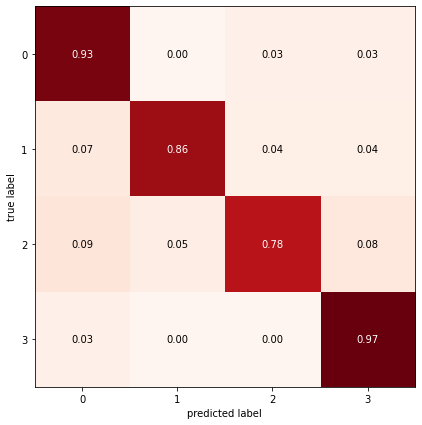

In [11]:
#Matriz de confusión a partir de los datos importados.
cm(y_g, y_g_pred)
plt.show()

In [12]:
#Cálculo de las métricas mencionadas al principio.
psg = precision_score(y_g, y_g_pred, average='macro')
rsg = recall_score(y_g, y_g_pred, average='macro')
print(f'Para el modelo de gravedad, la métrica precision tiene un valor de {psg}, y la métrica recall tiene un valor de {rsg}')

Para el modelo de gravedad, la métrica precision tiene un valor de 0.8685190201035271, y la métrica recall tiene un valor de 0.8867071524966262


### Sesgo

Finalmente, se realiza un proceso análogo al anterior, pero con el modelo de clasificación para el sesgo.

In [13]:
sequences_s = ts.texts_to_sequences(x)

x_s = pad_sequences(sequences_s, padding='pre', maxlen=300)

for i in range(len(y_g)):
  y_s[i] = int(y_s[i])

y_s = list(y_s)

In [14]:
y_s_pred = model_sesgo.predict(x_s)

y_s_pred = (y_s_pred > 0.5)
y_s_pred = y_s_pred.argmax(axis=1) - 1

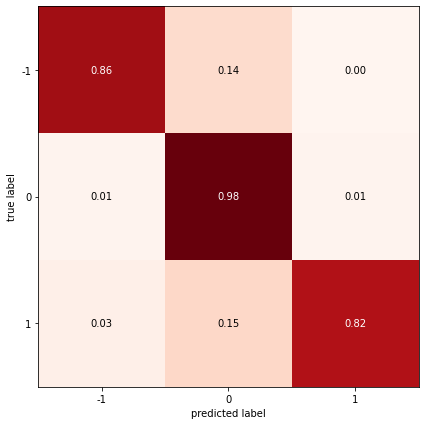

In [15]:
fig, ax = cm(y_s,y_s_pred)

ax.set_xticklabels([''] + list(np.unique(y_s_pred)))
ax.set_yticklabels([''] + list(np.unique(y_s)))
plt.show()

In [16]:
pss = precision_score(y_s, y_s_pred, average='macro')
rss = recall_score(y_s, y_s_pred, average='macro')
print(f'Para el modelo de gravedad, la métrica precision tiene un valor de {pss}, y la métrica recall tiene un valor de {rss}')

Para el modelo de gravedad, la métrica precision tiene un valor de 0.9290738083851426, y la métrica recall tiene un valor de 0.8884837839755871
